<a href="https://colab.research.google.com/github/karandoshi1810/Machine-Learning/blob/main/Hierarchical_Clustering(Practical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
#To import datafiles from Google Drive
from google.colab import drive

In [25]:
#To mount the drive data into colab cloud and enter the activation code

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset"

/content/drive/My Drive/Colab Notebooks/Dataset


In [27]:
#reading data from drive uing pandas library
df=pd.read_csv("insurance.csv")
print(df)
X=df.iloc[:,[2,6]].values #Extracting two columns namely BMI and Charges
X.shape

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


(1338, 2)

In [28]:
import scipy.cluster.hierarchy as sch

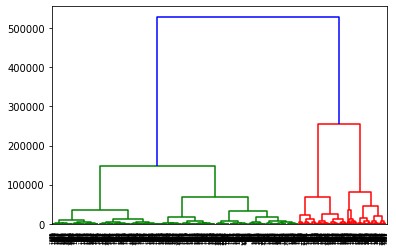

In [29]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward')) #Sketching Dendogram based on 'Ward" method between columns bmi and charges

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward') #Creating model

In [32]:
y_hc = hc.fit_predict(X) #Training Model

In [33]:
print(y_hc) #Values of trained model

[2 3 3 ... 3 3 2]


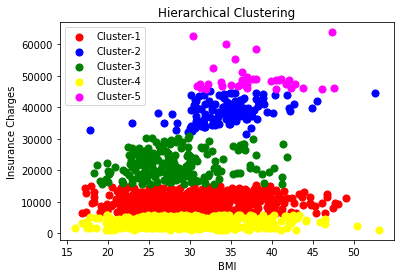

In [34]:
#Visualize the clusters
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='Cluster-1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='Cluster-2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='Cluster-3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='Cluster-4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='Cluster-5')

plt.title('Hierarchical Clustering')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

In [35]:
from sklearn.cluster import KMeans

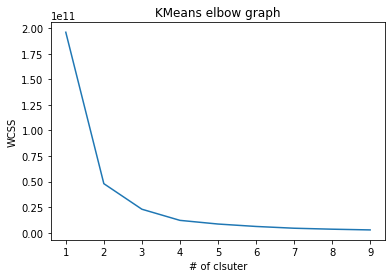

In [36]:
wcss=[] #Within Clusters Sum of Squares
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('KMeans elbow graph')
plt.ylabel('WCSS')
plt.xlabel('# of clsuter')
plt.show()

In [43]:
#Developing and Training K means model
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([2, 0, 0, ..., 0, 0, 6], dtype=int32)

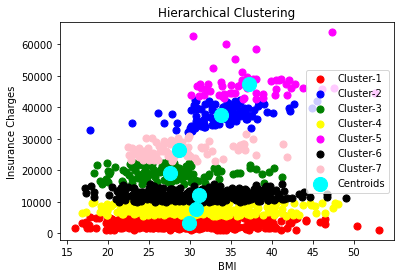

In [44]:
#Visualize the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluster-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluster-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluster-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='yellow',label='Cluster-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='magenta',label='Cluster-5')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=50,c='black',label='Cluster-6')
plt.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],s=50,c='pink',label='Cluster-7')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='cyan',label='Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()
